In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import sklearn.linear_model as skl
from sklearn.pipeline import make_pipeline

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n


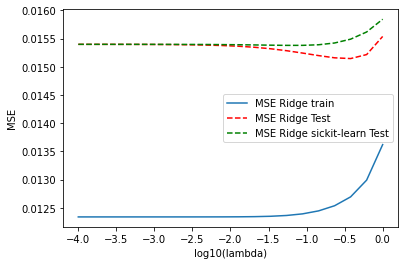

In [15]:
# Random seed to keep the same random number for every run
np.random.seed(213)

# numpy.random.randn generates samples from the normal distribution
# numpy.random.rand from a uniform distribution (in the range [0,1)).
x = np.random.rand(100)
y = 2.0 + 0.5*x*x + 0.1*np.random.randn(100)

X = np.zeros((len(x), 3))
X[:,0] = 1
X[:,1] = x
X[:,2] = x*x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train) # Compute the mean and std to be used for later scaling.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_tilde = X_train @ beta
y_predict = X_test @ beta

I = np.eye(3,3)
nlambdas = 20

# Ridge Regression
MSEpredictRidge = np.zeros(nlambdas)
MSEpredictSKL = np.zeros(nlambdas)
MSEtrain = np.zeros(nlambdas)
lambdas = np.logspace(-4,0,nlambdas)
for i in range(nlambdas):
    lm = lambdas[i]
    ridge = np.linalg.inv(X_train.T @ X_train + lm*I) @ X_train.T @ y_train
    SKLridge = skl.Ridge(alpha=lm).fit(X_train, y_train)
    yridge = SKLridge.predict(X_test)
    y_tilde = X_train @ ridge
    y_predict = X_test @ ridge
    MSEpredictRidge[i] = MSE(y_test, y_predict)
    MSEpredictSKL[i] = MSE(y_test, yridge)
    MSEtrain[i] = MSE(y_train, y_tilde)

plt.figure()
plt.plot(np.log10(lambdas), MSEtrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEpredictRidge, 'r--', label = 'MSE Ridge Test')
plt.plot(np.log10(lambdas), MSEpredictSKL, 'g--', label = 'MSE Ridge sickit-learn Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [19]:
x = np.random.rand(100) 
y = 2.0+5*x*x+0.1*np.random.randn(100)

p = 3 
X = np.zeros((len(x),p)) 
X[:,0] = 1.0 
X[:,1] = x 
X[:,2] = x*x 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train 
print(OLSbeta) 
print(np.linalg.inv(X_train.T @ X_train))

I = np.eye(p,p) 
nlambdas = 10 
MSEPredict = np.zeros(nlambdas) 
MSEPredictSKL = np.zeros(nlambdas) 
MSETrain = np.zeros(nlambdas) 
lambdas = np.logspace(-4, 0, nlambdas) 
for i in range(nlambdas): 
    lmb = lambdas[i] 
    Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmb*I) @ X_train.T @ y_train 
    print(np.linalg.inv(X_train.T @ X_train+lmb*I))

[1.9842131  0.02900902 4.9878087 ]
[[ 0.09422882 -0.37467407  0.30989628]
 [-0.37467407  2.06526174 -1.9504506 ]
 [ 0.30989628 -1.9504506   1.98242998]]
[[ 0.0942043  -0.37453277  0.3097589 ]
 [-0.37453277  2.06444107 -1.94964983]
 [ 0.3097589  -1.94964983  1.98164727]]
[[ 0.09416064 -0.37428118  0.30951429]
 [-0.37428118  2.06297983 -1.94822401]
 [ 0.30951429 -1.94822401  1.98025359]]
[[ 0.09403948 -0.37358301  0.3088355 ]
 [-0.37358301  2.05892486 -1.94426734]
 [ 0.3088355  -1.94426734  1.97638612]]
[[ 0.09370485 -0.37165487  0.30696094]
 [-0.37165487  2.04772631 -1.93334034]
 [ 0.30696094 -1.93334034  1.96570536]]
[[ 0.09279265 -0.36639983  0.30185238]
 [-0.36639983  2.01720624 -1.90356084]
 [ 0.30185238 -1.90356084  1.93659635]]
[[ 0.09039219 -0.35257868  0.28841995]
 [-0.35257868  1.93694382 -1.82524955]
 [ 0.28841995 -1.82524955  1.86004401]]
[[ 0.08461916 -0.31939187  0.25619028]
 [-0.31939187  1.74427287 -1.63728708]
 [ 0.25619028 -1.63728708  1.67627378]]
[[ 0.07328159 -0.2545

[1.95621775 0.26698371 4.73068162]
Training R2 for OLS
0.9969240688851116
Training MSE for OLS
0.007228867216687538
Test R2 for OLS
0.9971151714424102
Test MSE OLS
0.00956086293119408


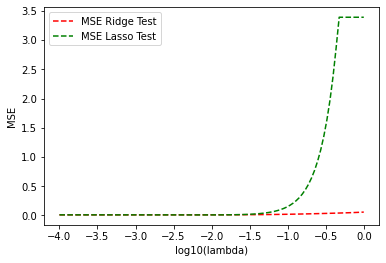

0.9827898468342597
3.390237546450618


In [22]:
x = np.random.rand(100) 
y = 2.0+5*x*x+0.1*np.random.randn(100)

p = 3 
X = np.zeros((len(x),p)) 
X[:,0] = 1.0 
X[:,1] = x 
X[:,2] = x*x 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

OLSbeta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train 
print(OLSbeta) 
ytildeOLS = X_train @ OLSbeta 
print("Training R2 for OLS") 
print(R2(y_train,ytildeOLS)) 
print("Training MSE for OLS") 
print(MSE(y_train,ytildeOLS)) 
ypredictOLS = X_test @ OLSbeta 
print("Test R2 for OLS") 
print(R2(y_test,ypredictOLS)) 
print("Test MSE OLS") 
print(MSE(y_test,ypredictOLS))

I = np.eye(p,p) 
nlambdas = 100 
MSEPredictLasso = np.zeros(nlambdas) 
MSEPredictRidge = np.zeros(nlambdas) 
lambdas = np.logspace(-4, 0, nlambdas) 
for i in range(nlambdas): 
    lmb = lambdas[i] 
    # add ridge 
    clf_ridge = skl.Ridge(alpha=lmb).fit(X_train, y_train) 
    clf_lasso = skl.Lasso(alpha=lmb).fit(X_train, y_train) 
    yridge = clf_ridge.predict(X_test) 
    ylasso = clf_lasso.predict(X_test) 
    MSEPredictLasso[i] = MSE(y_test,ylasso) 
    MSEPredictRidge[i] = MSE(y_test,yridge) 
    
plt.figure() 
plt.plot(np.log10(lambdas), MSEPredictRidge, 'r--', label = 'MSE Ridge Test') 
plt.plot(np.log10(lambdas), MSEPredictLasso, 'g--', label = 'MSE Lasso Test') 
plt.xlabel('log10(lambda)') 
plt.ylabel('MSE') 
plt.legend() 
plt.show()

print(R2(y_test, yridge))
print(MSE(y_test, ylasso))

NameError: name 'save_fig' is not defined

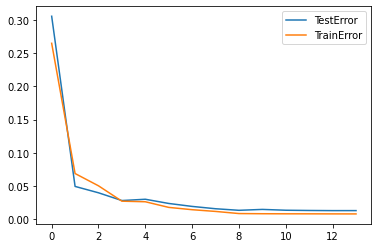

In [30]:
np.random.seed(833)
n = 100
maxdegree = 14

# data is defined by -3 < x < 3 with 100 data points
x = np.linspace(-3,3,n).reshape(-1,1)
y = np.exp(-x**2) + 1.5*np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), skl.LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scale,y_train)
    y_fit = clf.predict(x_train_scale)
    y_predict = clf.predict(x_test_scale)
    polydegree[degree] = degree
    TrainError[degree] = np.mean(np.mean((y_train - y_fit)**2))
    TestError[degree] = np.mean(np.mean((y_test - y_predict)**2))
    
plt.plot(polydegree, TestError, label='TestError')
plt.plot(polydegree, TrainError, label='TrainError')
plt.legend()
plt.show()